In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.int = np.int64
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd


### Objectives
Choose appropriate graph types based on data and problem context for explanatory visualizations

Use matplotlib syntax to create graphs and adjust elements

Create figures containing multiple graphs

### Visualization Motivation
#### Why Visualize Data?
Why can’t we just hand someone a table of data?

Let's load up the iris data set. This is a famous built-in dataset which is used to learn about categorization.

In [54]:
data = load_iris()
df_iris = pd.DataFrame(data['data'],columns=data['feature_names'])
df_iris['target'] = data['target']


### Dataframe vs Graph: Which do you prefer?
### Random data

In [55]:
df_iris.sample(5,random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


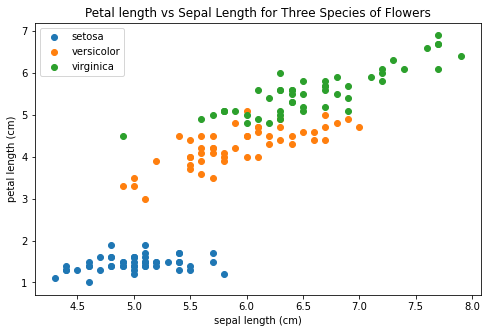

In [56]:
fig, ax = plt.subplots(figsize=(8,5))

#iterate through each type of flower and plot them using differenet colors
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target']==flower]
    x= subset_df['sepal length (cm)']
    y =  subset_df['petal length (cm)']
    
    ax.scatter(x,y,label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?
**-Virginica has long petals**

**-Positive correlation between sepal and petal length**

**-Three fairly distinct species of irises**

**-More overlap between versicolor and virginica**

**-Setosa petal length seems independent of sepal length**

### The Effectiveness of Visualizations
- people are highly visual ans can syntthesise visual info more quickly than rows and columns of numbers
- Precognitive understanding of data
- Visial representations can be much more viscerally persuasive
- Visuals can help identify patterns in the data to investigate    

### What Makes an Effective Visualization
Today, we want to focus on making data visualizations that an audience can easily comprehend and digest. These visualizations are typically referred to as **explanatory** visualizations.

Our goal in explanatory visualizations is to convey/communicate your insight(s) effectively to our audience. That audience can be other data scientist but could also be stakeholders unfamiliar with data analysis or statistical concepts.

#### NOTE

There are visualizations that have the goal in helping us (data scientists) better understand the data as we explore it. These are usually referred to as **exploratory** visualizations. These types of visualizations don't usually have to be as clean and tidy as *explanatory* visualizations.

- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently

-Red and Down tends to be negative while Green and Up is positive
-Lighter hues are seen as lower values and darker is higher values
-Axis start at zero
**Note**: All of these 'rules' can be broken but know that you will be working against most people's first instinct

### Anatomy of Visualizations
#### Length & Size
Showing the effect (careful about area....)

- Bar charts
- Stacked bar charts
- Scatter plot

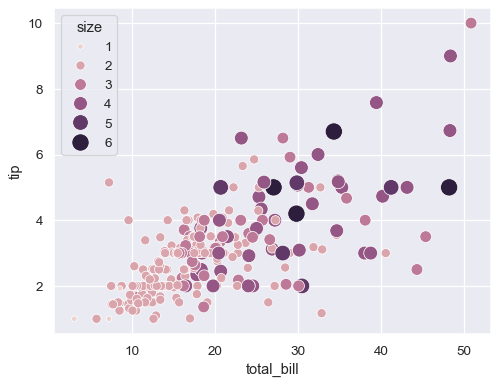

In [57]:
from PIL import Image
Image.open('size in visualization.png')

### Color
To draw specific findings (contrast)

Scatter plots
Bar charts (sometimes....)

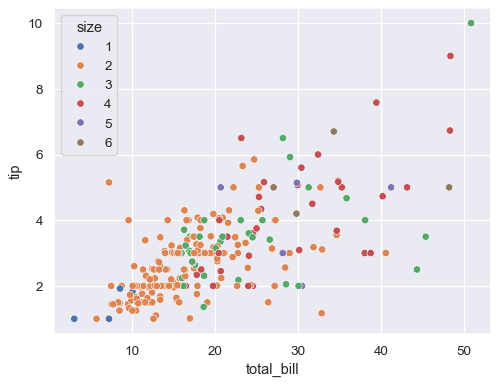

In [58]:
Image.open('color visualization.png')

### Shape
Distinguish different points

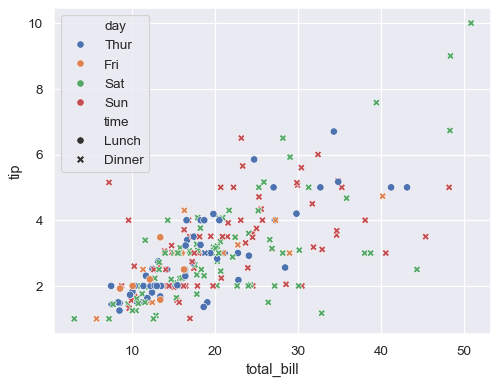

In [59]:
Image.open('shape visualization.png')

### Angle
**DON'T USE THIS!!!** Usually prone to lots of misinterpretations

- Pie Chart 🤬
- Donut Chart (pie charts in disguise!)
- Racetrack Chart

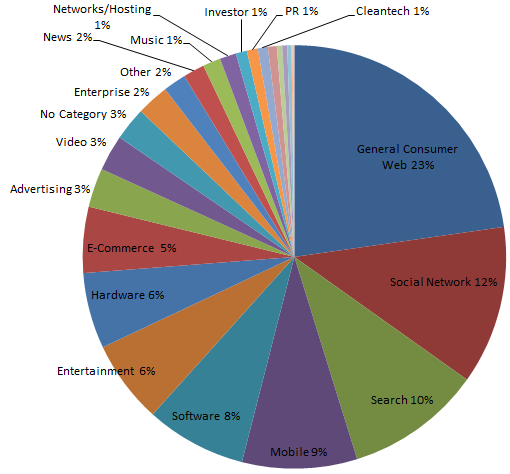

In [60]:
Image.open('pie visualization1.png')

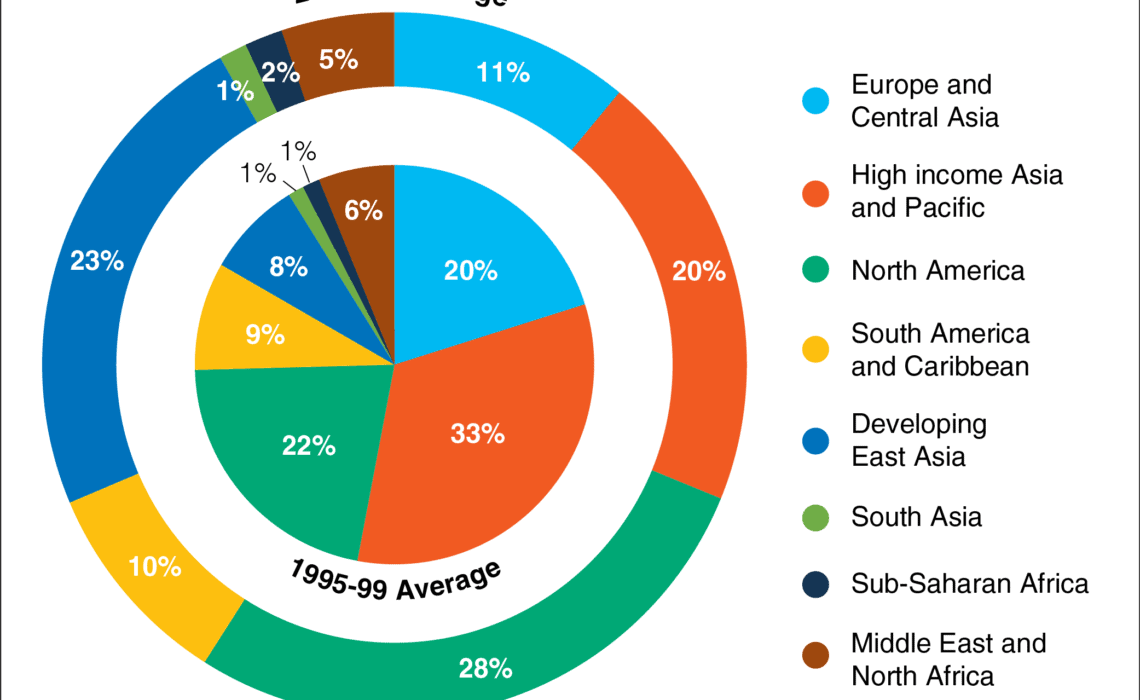

In [63]:
Image.open('pie visualization2.png') #donut change

### What Types Work Well Consistently
Experts and researchers found the best visual patterns humans identify well:

- Positional changes (scatter plots)
- Length changes (bar charts)

But we're bad at understanding other patterns...

- Color hue changes
- Area changes (pie charts!)

### How to Lie with Graphs
- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data
- Examples of dark patterns
    - Changing the axis scale
    - Using two different y axis scales to compare trends
    - Showing cumulative data which will always be increasing to hide a downturn in a trend
    - Pie charts (comparing degrees is not something people are good at) just use a bar chart
    - Inconsistent units
    - Not showing all of the data for motivated reasons
    - Percentages not adding up to 100

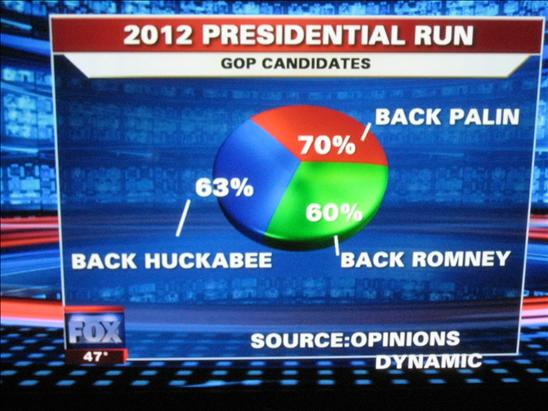

In [62]:
Image.open('presidentialRun Visualization.png')

### Exercise: Picking Proper Plots
Now that we've seen a few different visualizations, let's have a quick quiz in deciding would be a good plot for a given scenario:

#### Scenario 1
    **SCENARIO**: We have a company's past financial reports. We want to **compare how a company's revenue has done over these past few years**.

🤔 What type of visualization do you choose?

Possible Answers
- Line Plot #Good for indicating changes over time eg stock market
- Bar Chart 

#### Scenario 2
    **SCENARIO**: We're given a company's last quarterly report on sales from its website. We want to show the **relationship of the number of orders broken down by the type of device** the order was placed on.

🤔 What type of visualization do you choose?
- Bar chart # discrete variables
- Stacked Bar Chart

*scatter plot good for continous variables while here the devices are discrete

#### Scenario 3
    **SCENARIO**: A food delivery service has a breakdown of this past week's orders. We want to show the **relationship of the tips given in relation to the total bill**.

🤔 What type of visualization do you choose?
- Scatter plot

### Creating Data Visualization with matplotlib
There are lots of different ways of plotting data! (See also this page.)

We will make heavy use of:

- bar plots
- box plots
- histograms
- line plots
- scatter plots

These can all be handled by matplotlib and seaborn. These packages are great for data that exists in pandas DataFrames (or numpy arrays), and so they will often be very useful for us.

### Explanation of non-obvious terms:

- Figure - This is the "sheet of paper" all of your graphing sits on.

- Axis - An axis is an individual plot. You can have multiple axes on one figure

- Major/Minor Ticks - The large and small dashes on the x and y axis

- Markers - In a scatter plot each of the points is refered to as a marker

- Spines - The lines that bound each axis

### Common Charts and Their Uses
#### Scatter Plots
Scatter plots are very common. They allow one to visualize the relationship of two variables.

In the plots below, we see different correlations between variables:

In [64]:
penguins = sns.load_dataset('penguins')

In [65]:
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


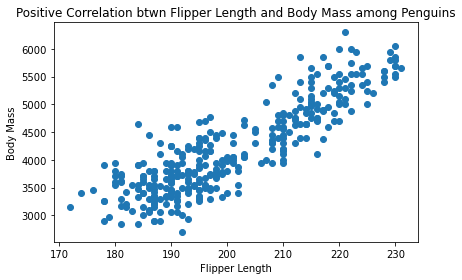

In [72]:
# This is the plotting syntax we recommend. Note that plt.subplots()
# returns a _double_: the figure object and the axis object.

fig, ax = plt.subplots()

ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g']) # continous layout
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')
plt.tight_layout()# adjusting spacing between plots
 #tight_layout() is called directly on the plt object or on a specific figure object.
#set_tight_layout() is called as a method on a Figure object.
#In summary, tight_layout() is more of an immediate action to adjust the layout, whereas set_tight_layout(True) configures the figure to always use tight layout adjustments.

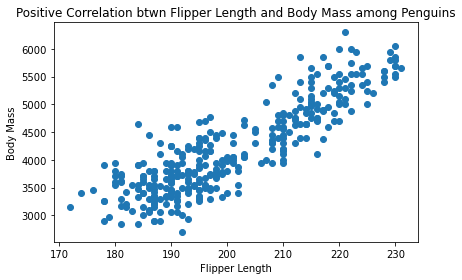

In [74]:
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')
plt.tight_layout()

We can also change color, opacity, marker size, and marker symbol.

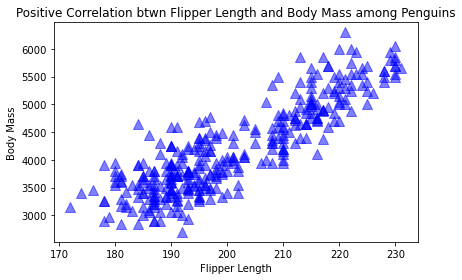

In [83]:
fig, ax = plt.subplots()

ax.scatter(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'],
           c='b', # c='blue'
           alpha=0.5,
           s=100,
           marker='^'
           ) # continous layout
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')
plt.tight_layout()# adjusting spacing between plots

We can also identify colors by hexadecimal code, one each for the amount of red, green, and blue. Values range from '00' to 'ff'.

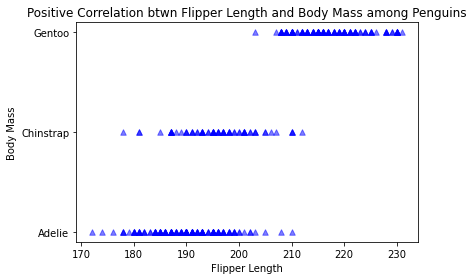

In [85]:
fig, ax = plt.subplots()

ax.scatter(x=penguins['flipper_length_mm'], y=penguins['species'],
           c='#0000ff', 
           alpha=0.5,
           s=30,
           marker='^'
           ) # continous layout
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')
ax.set_title('Positive Correlation btwn Flipper Length and Body Mass among Penguins')
plt.tight_layout()# adjusting spacing between plots
#graph looks like this coz its categorical we should think of another type of plot

### Line Plot
Tracks the change of a single variable over time. They are generally better than bar graphs over shorter periods of time.

Here is some code to read in some well worn shampoo sales data over a three year period.

In [91]:
shampoo = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')[:-1]

shampoo

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


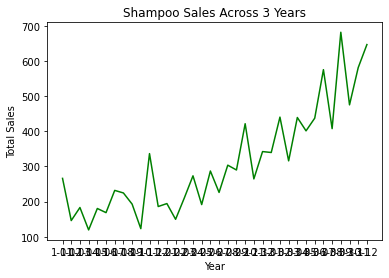

In [93]:
fig, ax = plt.subplots()
ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

The xticks are illegible in the plot above.

One way to combat that is to try rotating the ticks.

While we're at it, let's also change the linestyle.

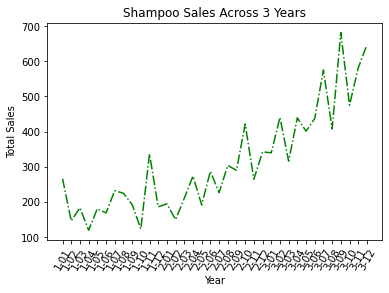

In [94]:
fig, ax = plt.subplots()
ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         c='g',ls='-.') # color='g', linestyle='dashdot')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=60);

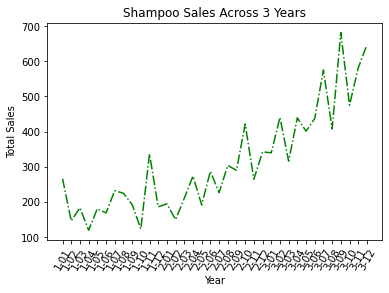

In [95]:
fig, ax = plt.subplots()

ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g', linestyle='dashdot')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.xticks(shampoo['Month'],
                   rotation=60);

Maybe better is to make custom ticks:

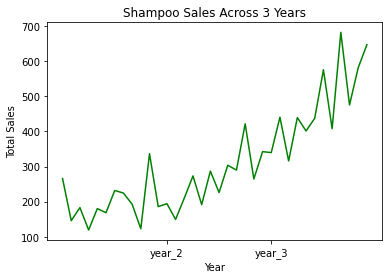

In [96]:
fig, ax = plt.subplots()

ax.plot(shampoo.index,
        shampoo['Sales of shampoo over a three year period'],
        color='g')
plt.xticks(range(12, 36, 12), labels=['year_2', 'year_3'])
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

### Histograms
We will get get further into histograms in Phase 2, but it is good to get familiar with them sooner rather than later.

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.

Histograms are often confused with bar charts, since they look somewhat similar. The big difference, however, is that histograms visualize the distribution of a **continuous variable**, rather than the **discrete variable shown by barcharts(categorical variables)**. You can remember this because the bins of histograms don't have spaces between them.

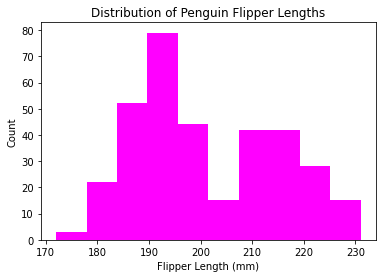

In [98]:
variable = penguins['flipper_length_mm']

fig, ax = plt.subplots()
ax.hist(variable, color='magenta')
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Penguin Flipper Lengths');

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other.

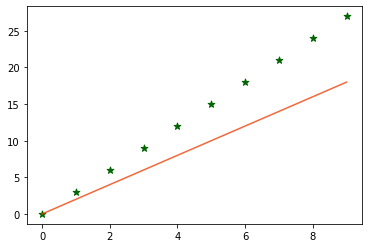

In [102]:
fig, ax = plt.subplots()
X = range(10)

Y1 = [2*x for x in X]
Y2 = [3*x for x in X]

ax.plot(X, Y1, c='#ef4209',alpha=0.8)
ax.scatter(X,Y2,c='darkgreen',marker='*', s=50);

### Saving your figures

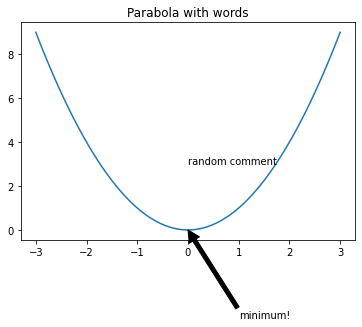

In [115]:
fig, ax  = plt.subplots()
X = np.linspace(-3,3,100)
Y = X **2
ax.plot(X, Y)
ax.set_title('Parabola with words')
ax.text(s='random comment',x=0,y=3)
ax.annotate(text='minimum!',xy=(0,0), xytext=(1,-4),
            arrowprops = {'facecolor':'black'}
            );

#lets save it!
plt.savefig('Images/parabola.png')


### Exercise: Customize Your Visualization
First, let's create a scatter plot from the penguins dataset of the length of their bill bill_length_mm and length of their flipper flipper_length_mm. Make sure you also give a title and axis labels.


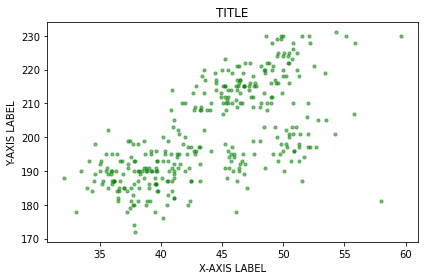

In [125]:
fig, ax = plt.subplots()

ax.scatter(penguins['bill_length_mm'],penguins['flipper_length_mm'],
           c='g',
           s=40,
           alpha=0.5,
           marker='.'
           )
ax.set_xlabel('X-AXIS LABEL')
ax.set_ylabel('Y-AXIS LABEL')
ax.set_title('TITLE')
plt.tight_layout()

### Multiple Plots
Sometimes we want multiple plots to be a part of the same figure.

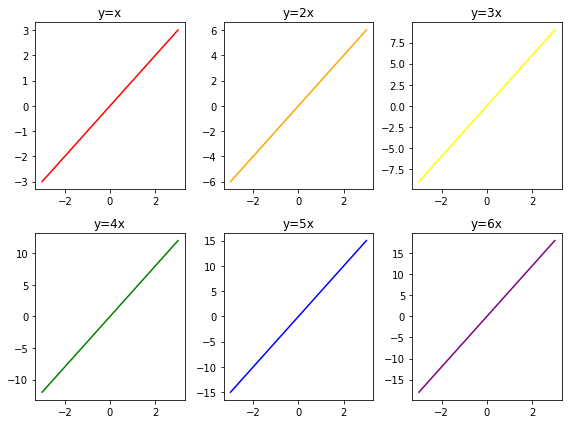

In [131]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
# The above line gives me a figure with six subplots,
# arranged in two rows of three.

X = np.linspace(-3, 3, 100)
Ys = [[j*x for x in X] for j in range(1, 7)]

ax[0,0].plot(X,Ys[0],c='r')
ax[0,0].set_title('y=x')

ax[0, 1].plot(X, Ys[1], c='orange')
ax[0, 1].set_title('y=2x')

ax[0, 2].plot(X, Ys[2], c='yellow')
ax[0, 2].set_title('y=3x')

ax[1, 0].plot(X, Ys[3], c='green')
ax[1, 0].set_title('y=4x')

ax[1, 1].plot(X, Ys[4], c='blue')
ax[1, 1].set_title('y=5x')

ax[1, 2].plot(X, Ys[5], c='purple')
ax[1, 2].set_title('y=6x')

plt.tight_layout();


### Slightly Different Notation
Note we could change the notation to unpack the passed axes in different ways. This can be useful in how we use the axis to make different plots.

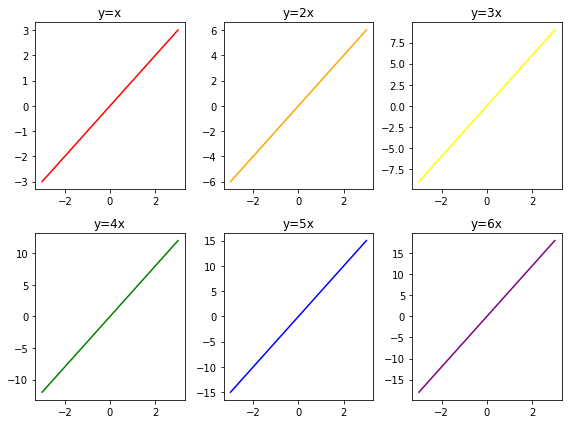

In [132]:
# This saves two arrays of axes representing each row and elements referring to 
# the columns
fig, (ax_row0,ax_row1) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

Ys = [[j*x for x in X] for j in range(1, 7)]

## First Row
ax_row0[0].plot(X, Ys[0], c='red')
ax_row0[0].set_title('y=x')

ax_row0[1].plot(X, Ys[1], c='orange')
ax_row0[1].set_title('y=2x')

ax_row0[2].plot(X, Ys[2], c='yellow')
ax_row0[2].set_title('y=3x')

## Second Row
ax_row1[0].plot(X, Ys[3], c='green')
ax_row1[0].set_title('y=4x')

ax_row1[1].plot(X, Ys[4], c='blue')
ax_row1[1].set_title('y=5x')

ax_row1[2].plot(X, Ys[5], c='purple')
ax_row1[2].set_title('y=6x')

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

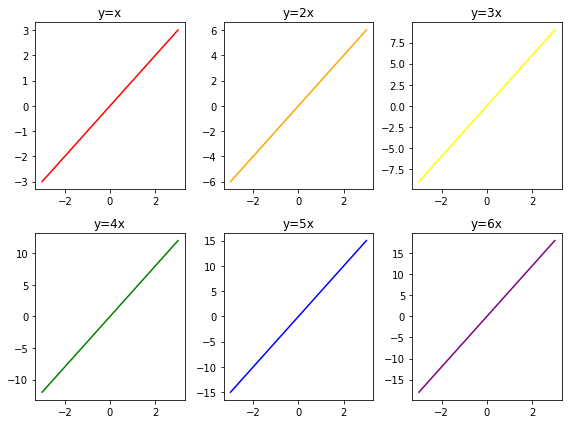

In [133]:
plt.tight_layout()
# This unpacks each axis as a separate variable
fig, ((ax00,ax01,ax02),(ax10,ax11,ax12)) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

Ys = [[j*x for x in X] for j in range(1, 7)]

## First Row
ax00.plot(X, Ys[0], c='red')
ax00.set_title('y=x')

ax01.plot(X, Ys[1], c='orange')
ax01.set_title('y=2x')

ax02.plot(X, Ys[2], c='yellow')
ax02.set_title('y=3x')

## Second Row
ax10.plot(X, Ys[3], c='green')
ax10.set_title('y=4x')

ax11.plot(X, Ys[4], c='blue')
ax11.set_title('y=5x')

ax12.plot(X, Ys[5], c='purple')
ax12.set_title('y=6x')

plt.tight_layout()

### Customize Multiple Plot Grid
We can add some parameters to plt.subplots() that allow us to treat the different axes the same

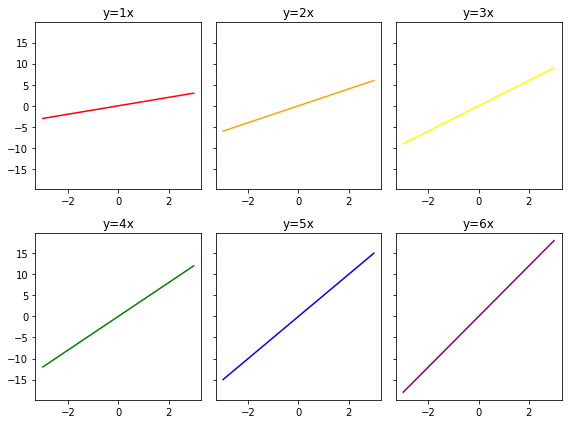

In [135]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey=True     # This allows for the y-axis to be consistent
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()

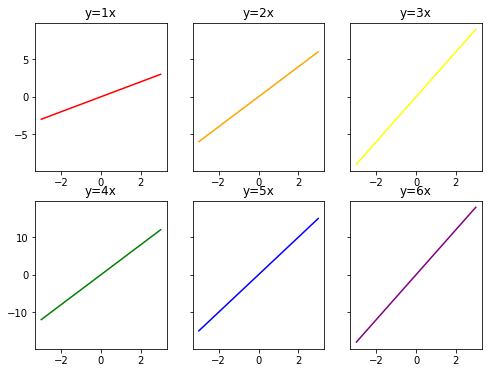

In [136]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey='row'    # y-axis to be consistent for each row
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1


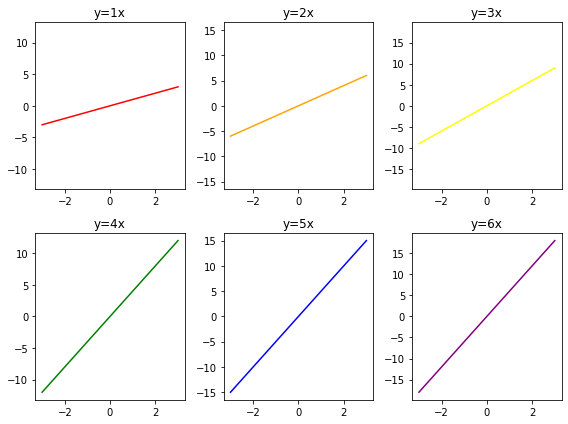

In [137]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
                nrows=nrows,
                ncols=ncols,
                figsize=(8, 6),
                sharey='col'    # y-axis to be consistent for each column
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.tight_layout()